# Digital Signal Processing
- audio
- images
- computational finance
- [SciPy](https://docs.scipy.org/doc/scipy/reference/)  mathematical software
    - [DSP routines](http://docs.scipy.org/doc/scipy-0.17.0/reference/tutorial/signal.html)
- StatModels is a popular statistics package that seems to do some things the 'R' way
    - [doc](http://www.statsmodels.org/stable/index.html)

/Users/lstead/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/lstead/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=11,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/lstead/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


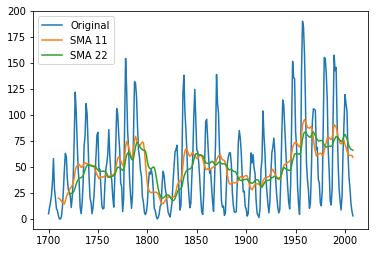

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.stats.moments import rolling_mean

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
year_range = df["YEAR"].values
plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, rolling_mean(df, 11)["SUNACTIVITY"].values, label="SMA 11")
plt.plot(year_range, rolling_mean(df, 22)["SUNACTIVITY"].values, label="SMA 22")
#plt.plot(year_range, df.rolling(center=False, window=11)["SUNACTIVITY"].values, label="SMA 11")
#plt.plot(year_range, df.rolling(center=False, window=22)["SUNACTIVITY"].values, label="SMA 22")
plt.legend()
plt.show()

[ 9 11 10  1  0]


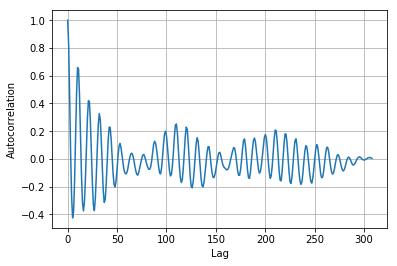

/Users/lstead/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


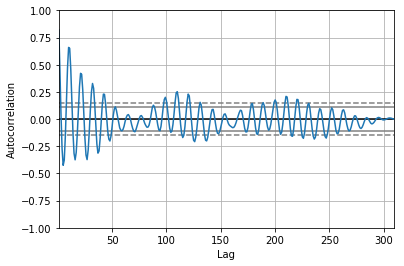

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot


data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values
y = data - np.mean(data)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
res = correlated[len(correlated)//2:]

print( np.argsort(res)[-5:])
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
autocorrelation_plot(data)
plt.show()


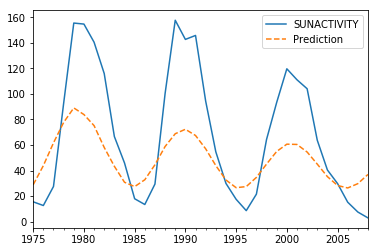

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), str(years[-1])))
del df["YEAR"]

model = sm.tsa.ARMA(df, (10,1)).fit()
prediction = model.predict('1975', str(years[-1]), dynamic=True)

df['1975':].plot()
prediction.plot(style='--', label='Prediction');
plt.legend();
plt.show()

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


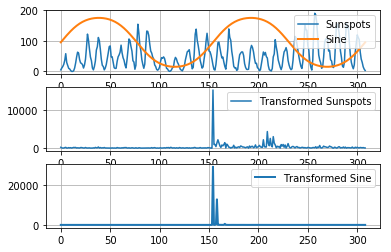

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(t))

sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])


transformed = np.abs(fftshift(rfft(sunspots)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()


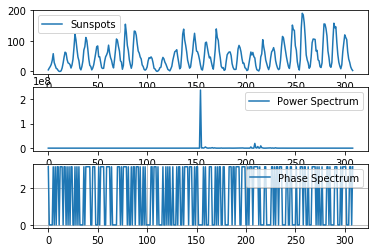

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

transformed = fftshift(rfft(sunspots))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()


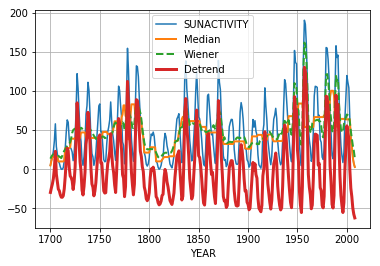

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend
import numpy as np

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

plt.plot(years, sunspots, label="SUNACTIVITY")
plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")
plt.plot(years, detrend(sunspots), lw=3, label="Detrend")
plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()
